## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=mnist.load_data()

#plt.imshow(X_train[0], cmap='gray')
#plt.title(f'Label: {y_train[0]}')
#plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**What is the no. of elements in the training and testing datasets?**

In [ ]:
#ENTER YOUR CODE HERE
print(X_train.shape[0])
print(X_test.shape[0])

60000
10000


**What are the labels in the dataset?**

In [ ]:
#ENTER YOUR CODE HERE

#the labels are exactly the numbers 0 to 9
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**Visualise one image for each label.**

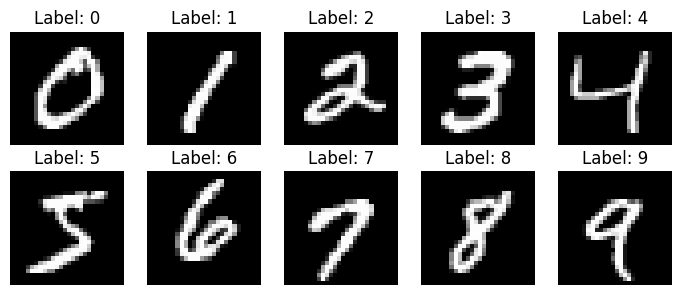

In [ ]:
#ENTER YOUR CODE HERE

# Find one example for each label (0-9)
uni = np.unique(y_train)
images_for_labels = [X_train[np.where(y_train == label)[0][0]] for label in uni]

# Plot the images
plt.figure(figsize=(7, 3))
for i, (label, image) in enumerate(zip(uni, images_for_labels)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

**One-hot encode the y labels.**

In [ ]:
#ENTER YOUR CODE HERE

numclass = 10
y_train_ohe = tf.keras.utils.to_categorical(y_train, numclass)
y_test_ohe = tf.keras.utils.to_categorical(y_test, numclass)

**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

Text(0.5, 1.0, 'Label: 5')

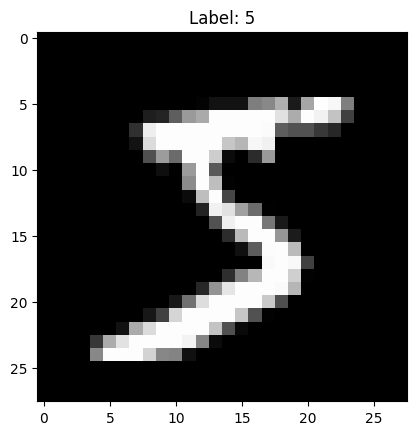

In [ ]:
#ENTER YOUR CODE HERE

print(X_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()



**Change the dimension of the training and testing datasets for it to become a 3D one.**
Hint: Currently the training dataset is of shape (60000, 28, 28) and you need to reshape it to (60000, 28, 28, 1). Do the same for the testing dataset.

In [ ]:
#ENTER YOUR CODE HERE

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [ ]:
#ENTER YOUR CODE HERE

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.** - (these are the optimal values of parameters for achieving maximum accuracy)

In [ ]:
model = tf.keras.models.Sequential()

# ENTER YOUR CODE HERE

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [ ]:
#ENTER YOUR CODE HERE

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Fit the model and plot the training history.**

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9172 - loss: 0.2702 - val_accuracy: 0.9787 - val_loss: 0.0647
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9870 - loss: 0.0425 - val_accuracy: 0.9892 - val_loss: 0.0304
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 36ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9931 - val_loss: 0.0239
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 33ms/step - accuracy: 0.9942 - loss: 0.0186 - val_accuracy: 0.9916 - val_loss: 0.0273
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9953 - loss: 0.0134 - val_accuracy: 0.9910 - val_loss: 0.0328
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9969 - loss: 0.0104 - val_accuracy: 0.9879 - val_loss: 0.0502
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9967 - loss: 0.0098 - val_accuracy: 0.9926 - val_loss: 0.0290
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9980 -

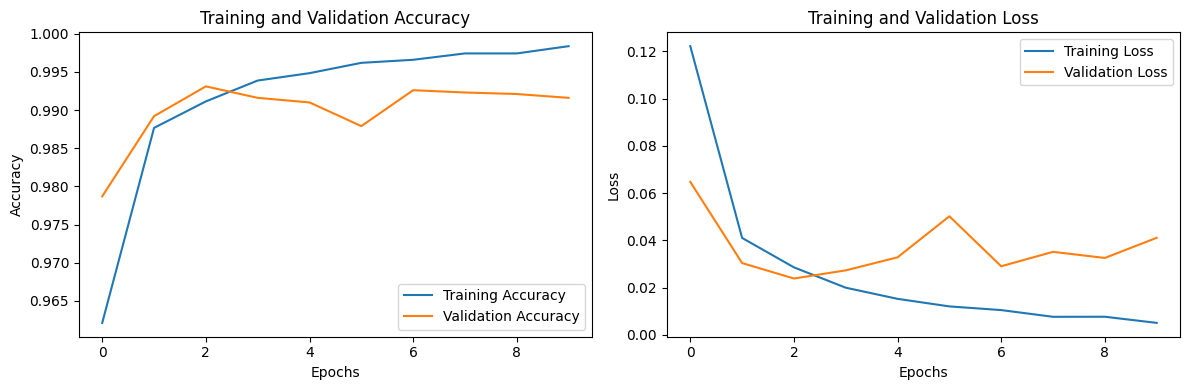

In [ ]:
#ENTER YOUR CODE HERE

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Now test your model on the training dataset and print the classification matrix.**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Lets visualise the prediction, along with the input now.**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


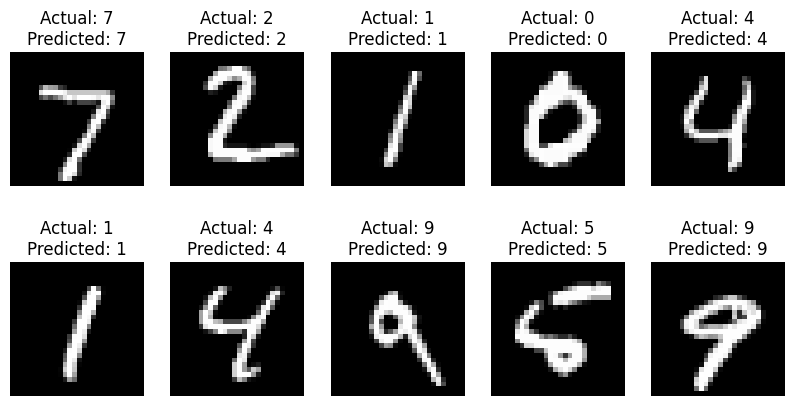

In [ ]:
rows = 2
columns = 5

y_pred = model.predict(X_test).argmax(axis=1)

figure = plt.figure(figsize=(10, 5))

for i in range(10):

    figure.add_subplot(rows, columns, i+1)

    plt.imshow(X_test[i], cmap='grey')
    plt.title(f"Actual: {y_test[i]}\nPredicted: {y_pred[i]}")
    plt.axis('off')

**But what did the convolution layers do? Lets visualise the outputs of filters for the first test image.**

In [ ]:
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

test_image = X_test[0].reshape(1, 28, 28, 1)

feature_maps = activation_model.predict(test_image)

plt.figure(figsize=(5, 5))
plt.imshow(test_image[0, :, :, 0], cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

n_filters = feature_maps[0].shape[-1]
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(n_filters):
    ax = axes[i // 8, i % 8]
    ax.imshow(feature_maps[0][0, :, :, i], cmap='grey')
    ax.axis('off')

plt.show()


**Output of the max pooling layer.**

In [ ]:
n_filters = feature_maps[1].shape[-1]
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(n_filters):
    ax = axes[i // 8, i % 8]
    ax.imshow(feature_maps[1][0, :, :, i], cmap='grey')
    ax.axis('off')

plt.show()